In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns

In [10]:

# 1. Load the Total Demand Data
df = pd.read_csv('../Data/totaldemand_nsw.csv')

In [11]:
# 2. Convert the 'DATETIME' column to datetime format using dayfirst=True and set as index
df['DATETIME'] = pd.to_datetime(df['DATETIME'], dayfirst=True)
df.sort_values('DATETIME', inplace=True)
df.set_index('DATETIME', inplace=True)

In [12]:
# 3. Resample the data to analyze trends
# Calculate daily, weekly, and monthly average demand using the 'TOTALDEMAND' column
daily_demand = df['TOTALDEMAND'].resample('D').mean()
weekly_demand = df['TOTALDEMAND'].resample('W').mean()
monthly_demand = df['TOTALDEMAND'].resample('M').mean()

C:\Users\mzafa\AppData\Local\Temp\ipykernel_21556\4252369693.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_demand = df['TOTALDEMAND'].resample('M').mean()


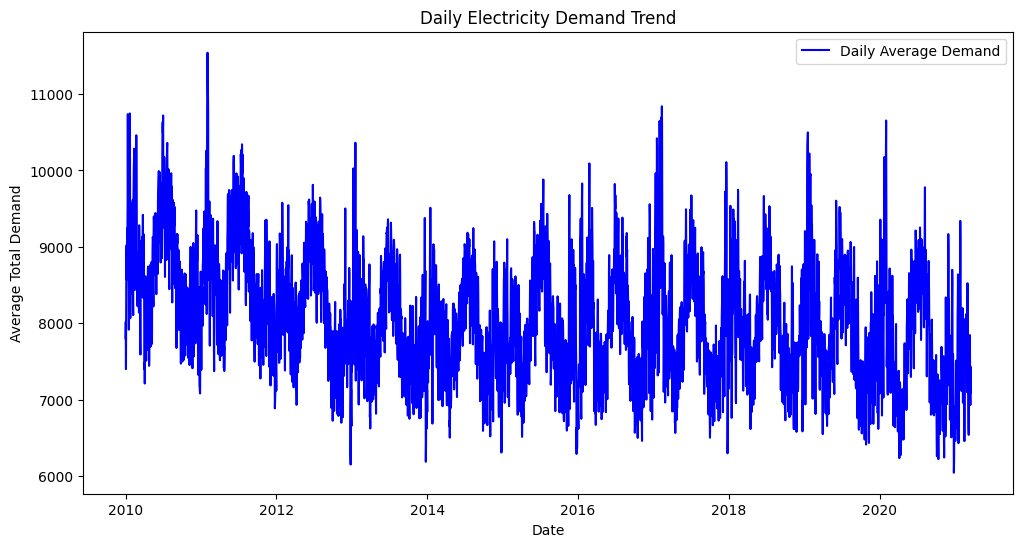

In [13]:
# 4. Plot Daily Trend
plt.figure(figsize=(12, 6))
plt.plot(daily_demand.index, daily_demand, label='Daily Average Demand', color='blue')
plt.xlabel('Date')
plt.ylabel('Average Total Demand')
plt.title('Daily Electricity Demand Trend')
plt.legend()
plt.show()

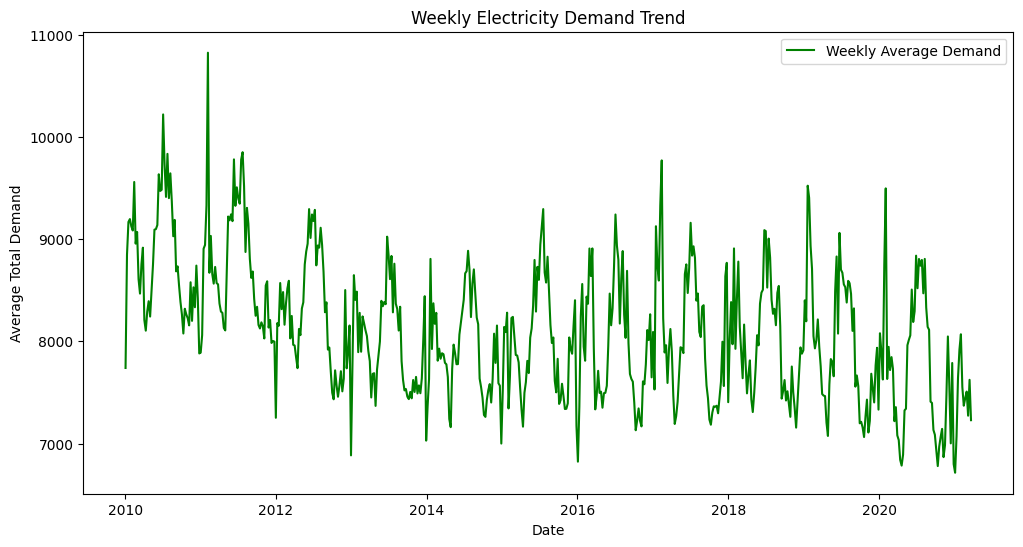

In [6]:
# 5. Plot Weekly Trend
plt.figure(figsize=(12, 6))
plt.plot(weekly_demand.index, weekly_demand, label='Weekly Average Demand', color='green')
plt.xlabel('Date')
plt.ylabel('Average Total Demand')
plt.title('Weekly Electricity Demand Trend')
plt.legend()
plt.show()


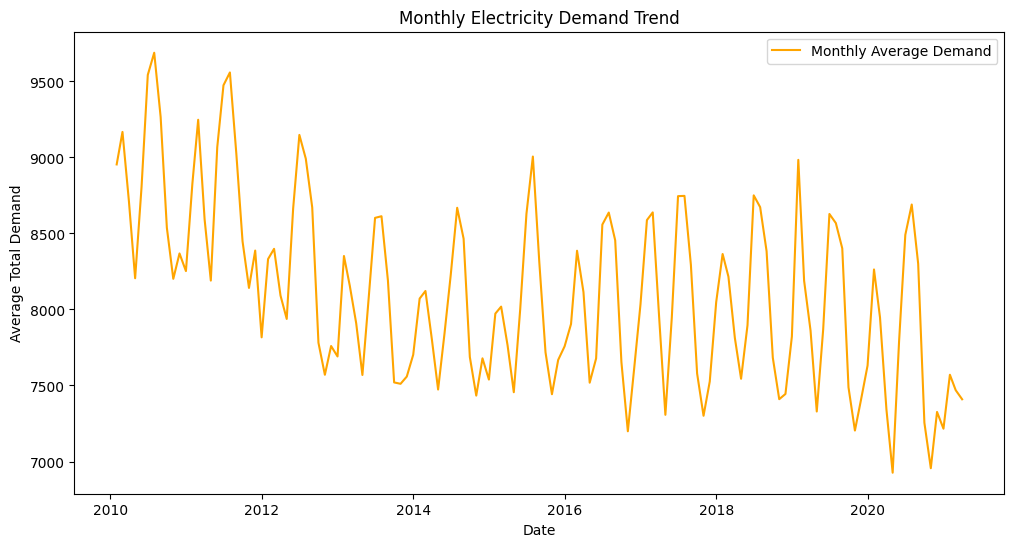

In [7]:
# 6. Plot Monthly Trend
plt.figure(figsize=(12, 6))
plt.plot(monthly_demand.index, monthly_demand, label='Monthly Average Demand', color='orange')
plt.xlabel('Date')
plt.ylabel('Average Total Demand')
plt.title('Monthly Electricity Demand Trend')
plt.legend()
plt.show()

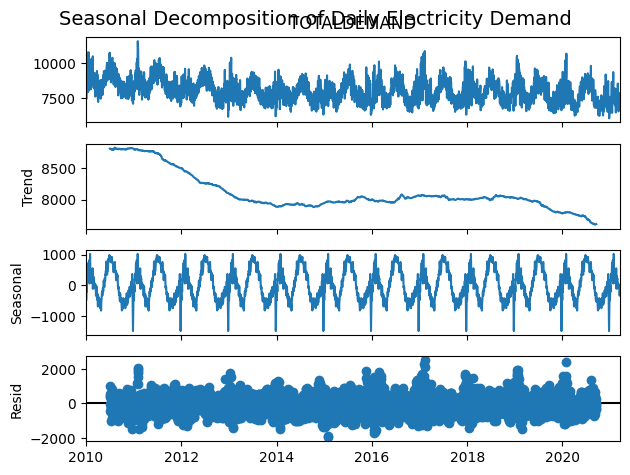

In [8]:
# 7. Perform Seasonal Decomposition on Daily Data
# Assuming an annual cycle (period=365) for seasonal patterns
decomposition = seasonal_decompose(daily_demand, model='additive', period=365)
decomposition.plot()
plt.suptitle('Seasonal Decomposition of Daily Electricity Demand', fontsize=14)
plt.show()

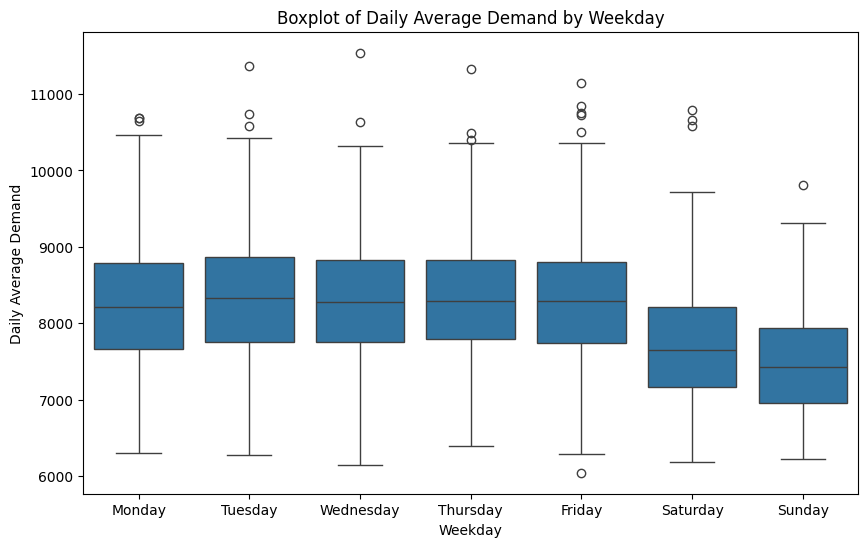

In [9]:
# 8. Create a Daily Boxplot Grouped by Weekday
# Convert daily_demand Series into a DataFrame with a weekday column
daily_df = daily_demand.to_frame(name='demand')
daily_df['weekday'] = daily_df.index.day_name()

# Define the correct weekday order
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create the boxplot using seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='weekday', y='demand', data=daily_df, order=weekday_order)
plt.xlabel('Weekday')
plt.ylabel('Daily Average Demand')
plt.title('Boxplot of Daily Average Demand by Weekday')
plt.show()

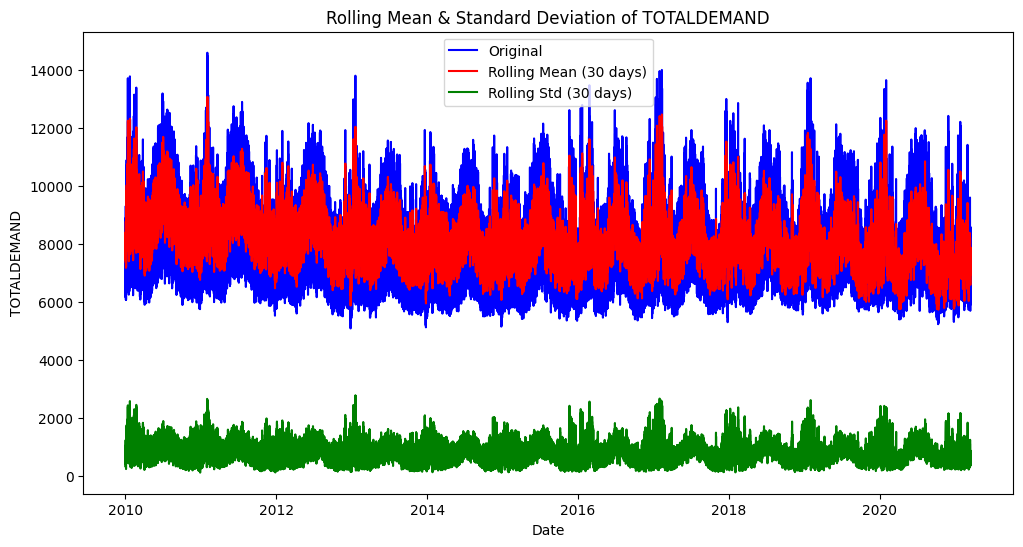

In [14]:
# Plot rolling mean and standard deviation (window = 30 days)
rolling_mean = df['TOTALDEMAND'].rolling(window=30).mean()
rolling_std = df['TOTALDEMAND'].rolling(window=30).std()
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['TOTALDEMAND'], label='Original', color='blue')
plt.plot(rolling_mean.index, rolling_mean, label='Rolling Mean (30 days)', color='red')
plt.plot(rolling_std.index, rolling_std, label='Rolling Std (30 days)', color='green')
plt.title('Rolling Mean & Standard Deviation of TOTALDEMAND')
plt.xlabel('Date')
plt.ylabel('TOTALDEMAND')
plt.legend()
plt.show()

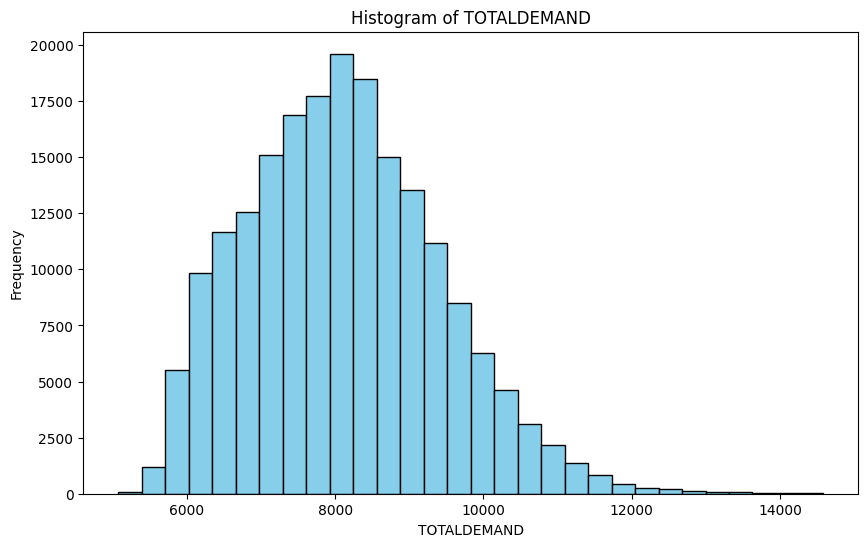

In [15]:
# Histogram to view the distribution of TOTALDEMAND
plt.figure(figsize=(10, 6))
plt.hist(df['TOTALDEMAND'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of TOTALDEMAND')
plt.xlabel('TOTALDEMAND')
plt.ylabel('Frequency')
plt.show()

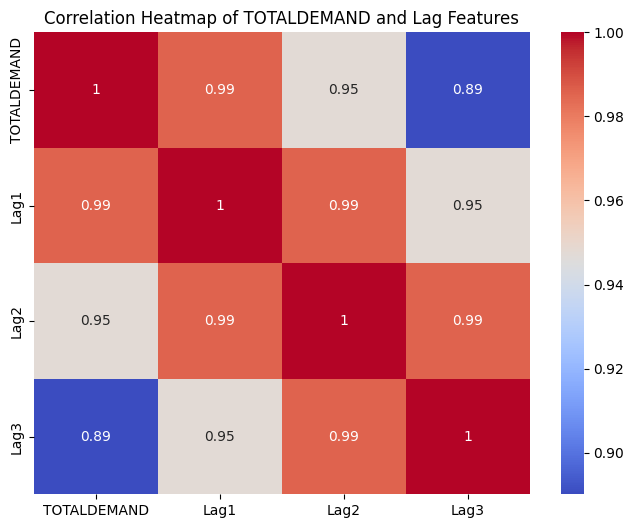

In [16]:
# Create lag features to check for correlation between consecutive time steps
df['Lag1'] = df['TOTALDEMAND'].shift(1)
df['Lag2'] = df['TOTALDEMAND'].shift(2)
df['Lag3'] = df['TOTALDEMAND'].shift(3)
df.dropna(inplace=True)

# Correlation heatmap for TOTALDEMAND and its lag features
plt.figure(figsize=(8, 6))
corr = df[['TOTALDEMAND', 'Lag1', 'Lag2', 'Lag3']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of TOTALDEMAND and Lag Features')
plt.show()

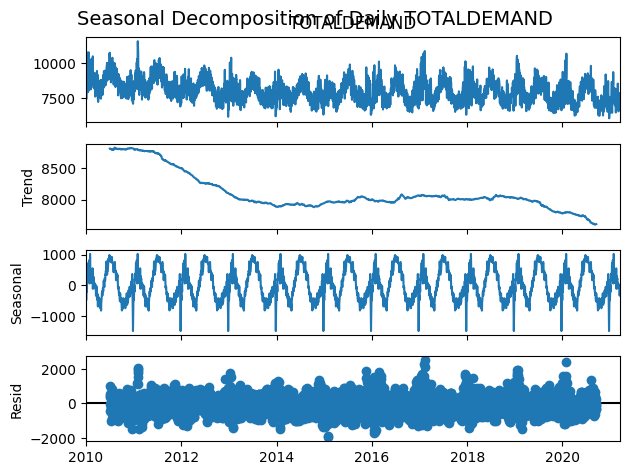

In [17]:
# (Optional) Seasonal Decomposition to inspect trend and seasonality
daily_series = df['TOTALDEMAND'].resample('D').mean()
decomposition = seasonal_decompose(daily_series, model='additive', period=365)
decomposition.plot()
plt.suptitle('Seasonal Decomposition of Daily TOTALDEMAND', fontsize=14)
plt.show()

Monthly Averages:
 Month
1     8348.662847
2     8329.031864
3     7967.744681
4     7586.945278
5     8150.532413
6     8799.715663
7     8894.755468
8     8524.075955
9     7759.178381
10    7488.182663
11    7703.029836
12    7773.638567
Name: TOTALDEMAND, dtype: float64


C:\Users\mzafa\AppData\Local\Temp\ipykernel_21556\582253299.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_avg.index, y=monthly_avg.values, palette="viridis")


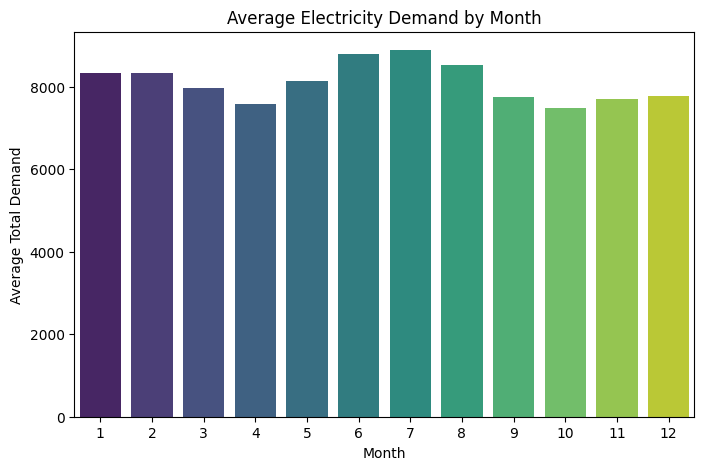

In [18]:
# Create columns for Month and Weekday
df['Month'] = df.index.month
df['Weekday'] = df.index.day_name()

# Aggregate data by month (average demand per month over all years)
monthly_avg = df.groupby('Month')['TOTALDEMAND'].mean()
print("Monthly Averages:\n", monthly_avg)

# Plot monthly averages as a bar plot
plt.figure(figsize=(8,5))
sns.barplot(x=monthly_avg.index, y=monthly_avg.values, palette="viridis")
plt.xlabel('Month')
plt.ylabel('Average Total Demand')
plt.title('Average Electricity Demand by Month')
plt.show()

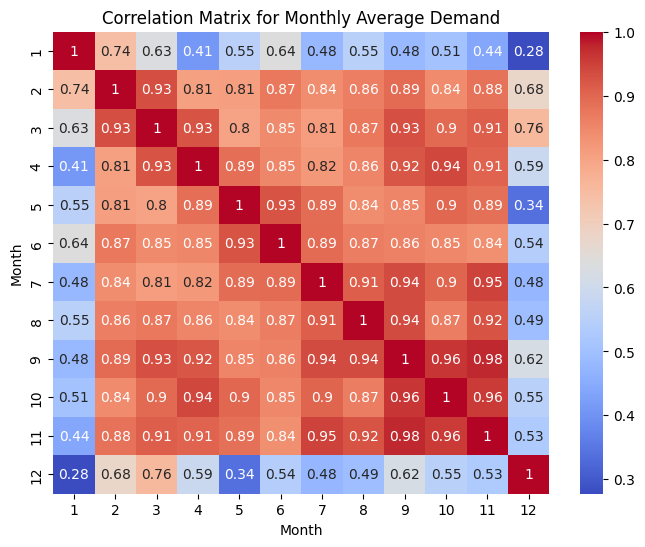

In [19]:
# If you want to see correlation among months, you could create a DataFrame 
# with one row per year and one column per month, then compute the correlation matrix.
df['Year'] = df.index.year
monthly_by_year = df.groupby(['Year', 'Month'])['TOTALDEMAND'].mean().unstack()
corr_months = monthly_by_year.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_months, annot=True, cmap="coolwarm")
plt.title('Correlation Matrix for Monthly Average Demand')
plt.show()

Weekday Averages:
 Weekday
Monday       8233.071258
Tuesday      8358.963726
Wednesday    8326.009179
Thursday     8351.029746
Friday       8307.241045
Saturday     7717.352718
Sunday       7498.808161
Name: TOTALDEMAND, dtype: float64


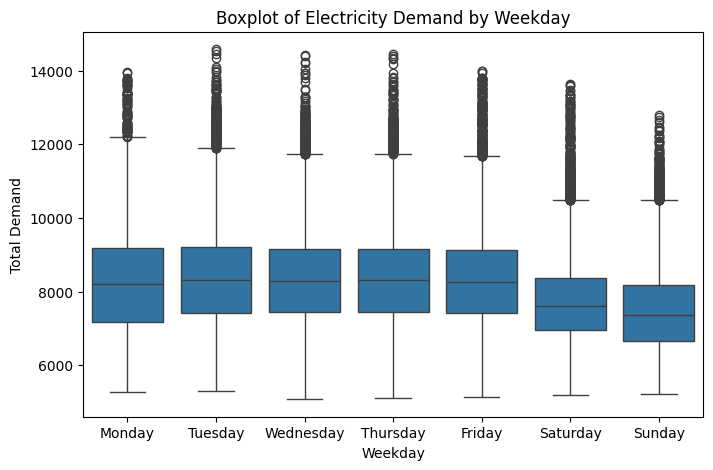

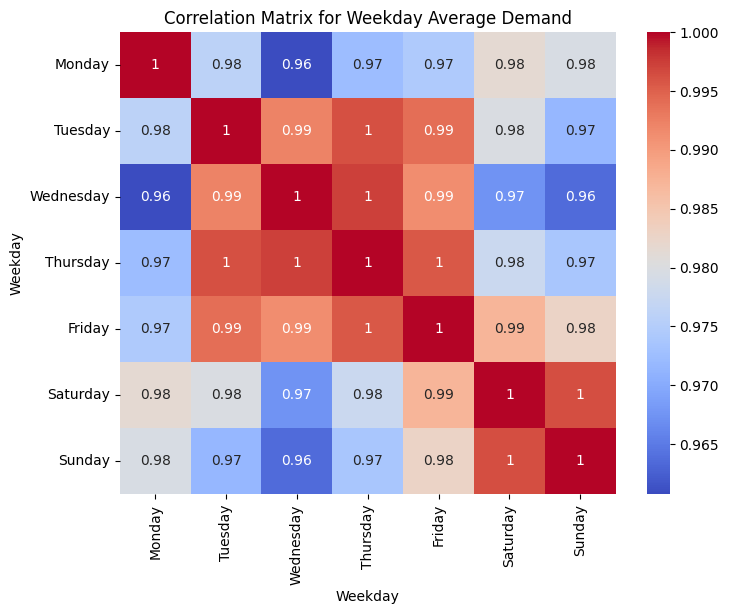

In [20]:
# Aggregate data by weekday
weekday_avg = df.groupby('Weekday')['TOTALDEMAND'].mean()
# To ensure the correct order, specify the weekday order
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_avg = weekday_avg.reindex(weekday_order)
print("Weekday Averages:\n", weekday_avg)

# Plot weekday averages as a boxplot
plt.figure(figsize=(8,5))
sns.boxplot(x=df['Weekday'], y=df['TOTALDEMAND'], order=weekday_order)
plt.xlabel('Weekday')
plt.ylabel('Total Demand')
plt.title('Boxplot of Electricity Demand by Weekday')
plt.show()

# For correlation among weekdays, one approach is to create a pivot table with years as rows and weekdays as columns.
# Compute average demand for each weekday per year:
weekday_by_year = df.groupby(['Year', 'Weekday'])['TOTALDEMAND'].mean().unstack()
weekday_by_year = weekday_by_year[weekday_order]  # Ensure proper order
corr_weekdays = weekday_by_year.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_weekdays, annot=True, cmap="coolwarm")
plt.title('Correlation Matrix for Weekday Average Demand')
plt.show()

In [22]:
import holidays

# 3. Add Australian Holiday Flag
# Create a holidays object for Australia covering all years in the dataset
aus_holidays = holidays.Australia(years=range(df.index.year.min(), df.index.year.max()+1))
# Create a new boolean column 'Holiday' that is True if the date is an Australian holiday
df['Holiday'] = df.index.to_series().apply(lambda date: date in aus_holidays)

Average TOTALDEMAND on Non-Holidays: 8132.099185346191
Average TOTALDEMAND on Holidays: 7136.774496124031


C:\Users\mzafa\AppData\Local\Temp\ipykernel_21556\2936959459.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_demand.index.astype(str), y=avg_demand.values, palette='viridis')


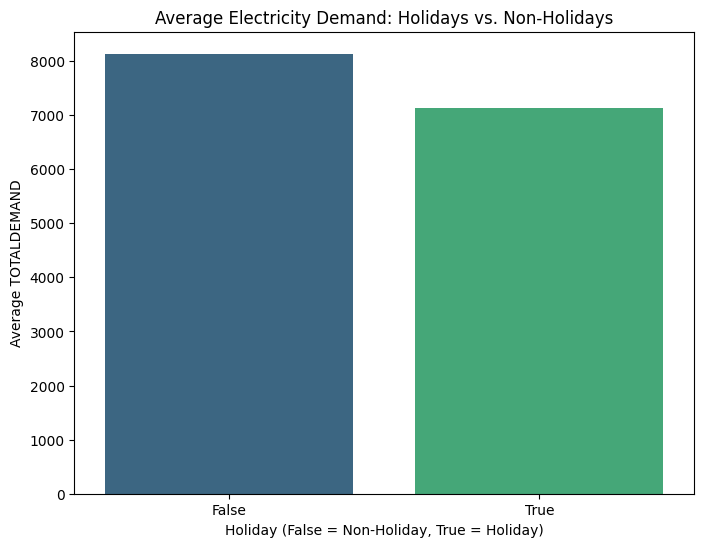

C:\Users\mzafa\AppData\Local\Temp\ipykernel_21556\2936959459.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Holiday', y='TOTALDEMAND', data=df, palette='viridis')


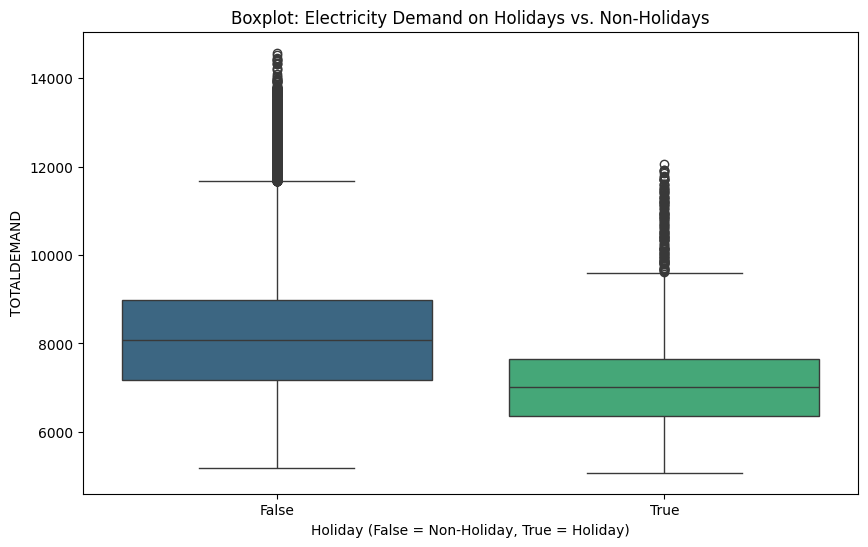

In [23]:
# 4. Compare Average TOTALDEMAND on Holidays vs. Non-Holidays
avg_demand = df.groupby('Holiday')['TOTALDEMAND'].mean()
print("Average TOTALDEMAND on Non-Holidays:", avg_demand[False])
print("Average TOTALDEMAND on Holidays:", avg_demand[True])

# 5. Plot Bar Chart of Average Demand
plt.figure(figsize=(8,6))
sns.barplot(x=avg_demand.index.astype(str), y=avg_demand.values, palette='viridis')
plt.xlabel('Holiday (False = Non-Holiday, True = Holiday)')
plt.ylabel('Average TOTALDEMAND')
plt.title('Average Electricity Demand: Holidays vs. Non-Holidays')
plt.show()

# 6. Plot Boxplot for Demand Distribution on Holidays vs. Non-Holidays
plt.figure(figsize=(10,6))
sns.boxplot(x='Holiday', y='TOTALDEMAND', data=df, palette='viridis')
plt.xlabel('Holiday (False = Non-Holiday, True = Holiday)')
plt.ylabel('TOTALDEMAND')
plt.title('Boxplot: Electricity Demand on Holidays vs. Non-Holidays')
plt.show()

In [25]:
# Create an Australian holidays object for a specific year (e.g., 2023)
aus_holidays = holidays.Australia(years=2024)

# Extract unique holiday names
holiday_names = set(aus_holidays.values())

print("Australian Holiday Names in 2023:")
for name in sorted(holiday_names):
    print(name)

Australian Holiday Names in 2023:
ANZAC Day
Australia Day
Boxing Day
Christmas Day
Easter Monday
Good Friday
New Year's Day


C:\Users\mzafa\AppData\Local\Temp\ipykernel_21556\2442208768.py:25: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  summer_monthly = summer_df['TOTALDEMAND'].resample('M').mean()
C:\Users\mzafa\AppData\Local\Temp\ipykernel_21556\2442208768.py:26: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  winter_monthly = winter_df['TOTALDEMAND'].resample('M').mean()


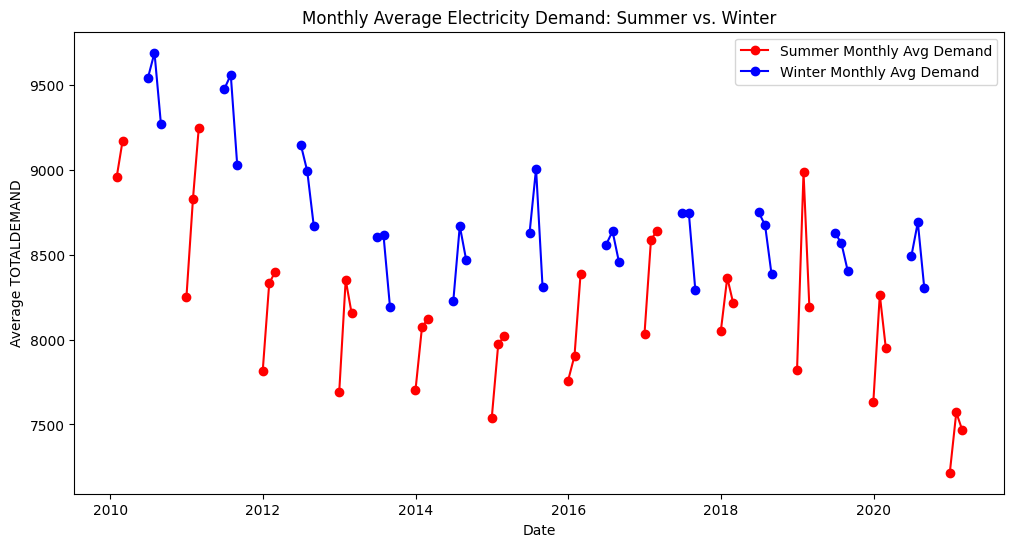

In [26]:
# 3. Define a function to assign season based on month.
# For Australia, assume:
# - Summer: December, January, February
# - Winter: June, July, August
# Other months are labeled as 'Other'
def assign_season(month):
    if month in [12, 1, 2]:
        return "Summer"
    elif month in [6, 7, 8]:
        return "Winter"
    else:
        return "Other"

# Apply the function to create a new 'Season' column
df['Season'] = df.index.month.map(assign_season)

# Filter the data for Summer and Winter only
season_df = df[df['Season'].isin(["Summer", "Winter"])].copy()

# 4. Compute Monthly Average Demand for Summer and Winter
# Resample by month for each season
summer_df = season_df[season_df['Season'] == "Summer"]
winter_df = season_df[season_df['Season'] == "Winter"]

summer_monthly = summer_df['TOTALDEMAND'].resample('M').mean()
winter_monthly = winter_df['TOTALDEMAND'].resample('M').mean()

# Plot monthly averages on the same figure for comparison
plt.figure(figsize=(12, 6))
plt.plot(summer_monthly.index, summer_monthly, label='Summer Monthly Avg Demand', color='red', marker='o')
plt.plot(winter_monthly.index, winter_monthly, label='Winter Monthly Avg Demand', color='blue', marker='o')
plt.xlabel('Date')
plt.ylabel('Average TOTALDEMAND')
plt.title('Monthly Average Electricity Demand: Summer vs. Winter')
plt.legend()
plt.show()

C:\Users\mzafa\AppData\Local\Temp\ipykernel_21556\1665406313.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Season', y='TOTALDEMAND', data=daily_season, palette='viridis')


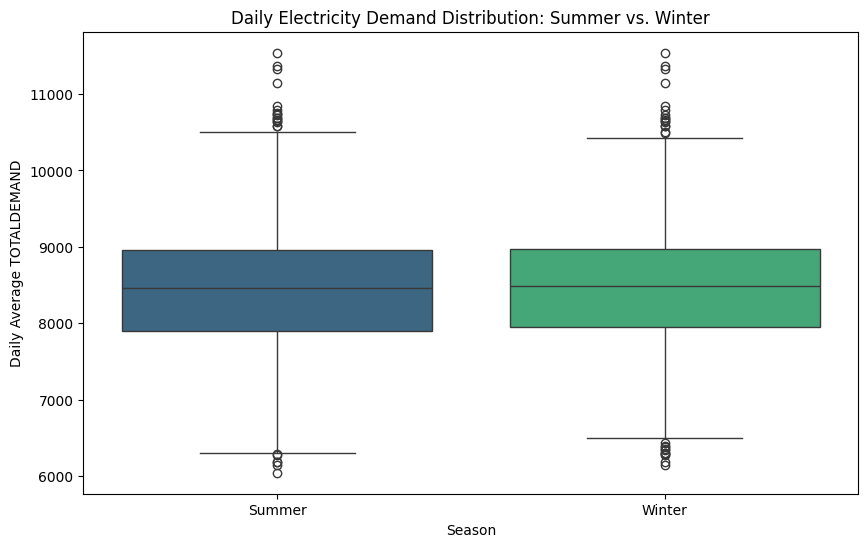

In [27]:
# 5. Compute Daily Average Demand for Summer and Winter and Create Boxplots
# Resample daily for each season
summer_daily = summer_df['TOTALDEMAND'].resample('D').mean().to_frame(name='TOTALDEMAND')
winter_daily = winter_df['TOTALDEMAND'].resample('D').mean().to_frame(name='TOTALDEMAND')

summer_daily['Season'] = 'Summer'
winter_daily['Season'] = 'Winter'

# Concatenate the daily data for boxplot analysis
daily_season = pd.concat([summer_daily, winter_daily])

plt.figure(figsize=(10, 6))
sns.boxplot(x='Season', y='TOTALDEMAND', data=daily_season, palette='viridis')
plt.xlabel('Season')
plt.ylabel('Daily Average TOTALDEMAND')
plt.title('Daily Electricity Demand Distribution: Summer vs. Winter')
plt.show()

<Figure size 1000x600 with 0 Axes>

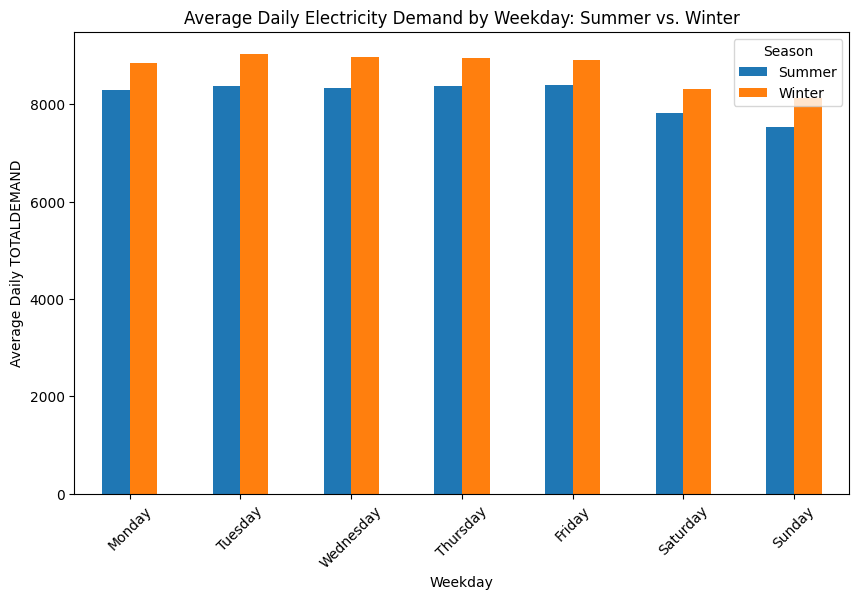

In [28]:
# Filter for Summer and Winter
summer_df = df[df['Season'] == "Summer"]
winter_df = df[df['Season'] == "Winter"]

# Resample to daily averages for each season
summer_daily = summer_df['TOTALDEMAND'].resample('D').mean().to_frame(name='TOTALDEMAND')
winter_daily = winter_df['TOTALDEMAND'].resample('D').mean().to_frame(name='TOTALDEMAND')

# Add a 'Weekday' column based on the date
summer_daily['Weekday'] = summer_daily.index.day_name()
winter_daily['Weekday'] = winter_daily.index.day_name()

# Group by weekday to compute average demand in summer and winter
summer_weekday_avg = summer_daily.groupby('Weekday')['TOTALDEMAND'].mean()
winter_weekday_avg = winter_daily.groupby('Weekday')['TOTALDEMAND'].mean()

# Define the weekday order (ensuring the correct order)
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
summer_weekday_avg = summer_weekday_avg.reindex(weekday_order)
winter_weekday_avg = winter_weekday_avg.reindex(weekday_order)

# Combine the results into a single DataFrame for comparison
comparison_df = pd.DataFrame({
    'Summer': summer_weekday_avg,
    'Winter': winter_weekday_avg
})

# Plot the grouped bar chart
plt.figure(figsize=(10, 6))
comparison_df.plot(kind='bar', figsize=(10,6))
plt.xlabel('Weekday')
plt.ylabel('Average Daily TOTALDEMAND')
plt.title('Average Daily Electricity Demand by Weekday: Summer vs. Winter')
plt.xticks(rotation=45)
plt.legend(title='Season')
plt.show()
